# MILBINDING #

This notebook is a tutorial showing how to use the model presented in:

_**Predicting the binding of small molecules to proteins through invariant representation of the molecular structure**_ - R. Beccaria, et al.


In these two esamples we load a ligand and a pocket pdb and compute their encoded fingerprint.

In [2]:
import warnings
warnings.filterwarnings("ignore")

from utils_tutorial import Load_graph_auto_ligand, Load_graph_auto_pocket
from utils_tutorial import Get_latent_pocket, Get_latent_ligand
from utils_tutorial import Get_encoded_matrix_ligand,Get_encoded_matrix_pocket

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pickle as cPickle

In [3]:
# Select the path to the pdbs of the ligand and of the pocket.

pdb_ligand="pdbs_tutorial/1RKP_ligand.pdb"
pdb_pocket="pdbs_tutorial/1RKP_pocket.pdb"

In [4]:
# Load the autoencoder for the ligand and the autoencoder for the pockets

auto_graph_ligand = Load_graph_auto_ligand()
auto_graph_pocket = Load_graph_auto_pocket()


# Get latent vector for ligand and pocket

latent_vec_ligand, atoms_ligand = Get_latent_ligand(pdb_ligand,auto_graph_ligand)
latent_vec_pocket, atoms_pocket = Get_latent_pocket(pdb_pocket, auto_graph_pocket)


In [5]:
# Get the encoded matrixes from latent vector

num_bins_pock=4      
num_bins_lig=40      

encoded_matrix_ligand, atoms_lig_mat, bins_lig_mat = Get_encoded_matrix_ligand(latent_vec_ligand, atoms_ligand, num_bins_lig)
encoded_matrix_pocket, atoms_pock_mat, bins_pock_mat = Get_encoded_matrix_pocket(latent_vec_pocket, atoms_pocket, num_bins_pock)

In [6]:
# Make a Binding prediction for that ligand-pocket comples
# 1 means they bind, 0 means they do not bind

# Load Random Forest
RF = RandomForestClassifier()
with open("./datasets_and_RFs/final_random_forests_Best_DUDE_on_BindingDB_4bins_rf_val_NoRep", "rb") as f:
    RF = cPickle.load(f)

# Concatenate matrix and pocket embeddings
data_to_evaluate=np.concatenate((encoded_matrix_pocket.reshape(-1), encoded_matrix_ligand.reshape(-1))).reshape(1,-1)

# Make prediction
prediction = RF.predict(data_to_evaluate)

print(f"Random Forest prediction = {prediction}")


Random Forest prediction = [1]


You can also change the number of bins used for the embedding matrix accordingly to the task you want to use this representation for.
Here there is an example how to change the number of bins used in the representaiton and hot to display the embedded matrixes.

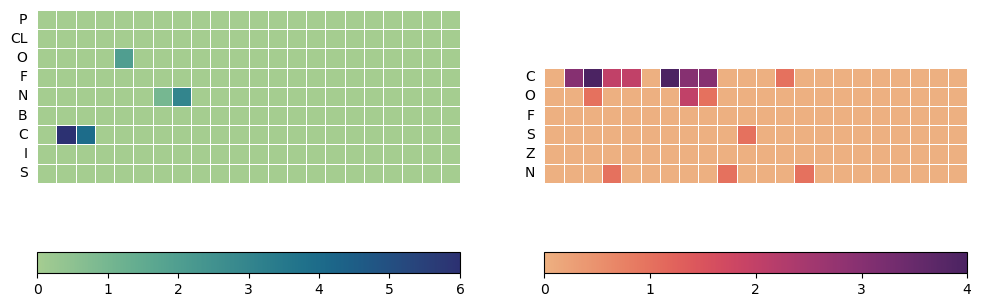

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_bins=20 # you can choose between [2,4,5,10,20,40]. Default values is 40
encoded_matrix_ligand, atoms_lig_mat, bins_lig_mat = Get_encoded_matrix_ligand(latent_vec_ligand, atoms_ligand, num_bins)
encoded_matrix_pocket, atoms_pock_mat, bins_pock_mat = Get_encoded_matrix_pocket(latent_vec_pocket, atoms_pocket, num_bins)

fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})  # Create a figure with two subplots

sns.heatmap(encoded_matrix_ligand, linewidth=0.5, cmap="crest", square=True, ax=axs[0], cbar=False)
axs[0].set_yticklabels(atoms_lig_mat, rotation=0, ha='right')
axs[0].set(xticklabels=[])
axs[0].set(xlabel=None)
axs[0].tick_params(left=False, bottom=False)
cbar = axs[0].figure.colorbar(axs[0].collections[0], ax=axs[0], orientation='horizontal')
cbar.set_ticks(np.arange(int(np.min(encoded_matrix_ligand)), int(np.max(encoded_matrix_ligand))+1, 1))

sns.heatmap(encoded_matrix_pocket, linewidth=0.5, cmap="flare", square=True, ax=axs[1], cbar=False)
axs[1].set_yticklabels(atoms_pock_mat, rotation=0, ha='right')
axs[1].set(xticklabels=[])
axs[1].set(xlabel=None)
axs[1].tick_params(left=False, bottom=False)

cbar = axs[1].figure.colorbar(axs[1].collections[0], ax=axs[1], orientation='horizontal')
cbar.set_ticks(np.arange(int(np.min(encoded_matrix_pocket)), int(np.max(encoded_matrix_pocket))+1, 1))



plt.show()
